In [1]:
install.packages('forecast')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [2]:
library(readr)
library(mgcv)
library(forecast)
library(tidyverse)
library(lubridate)
library(stringr)
library(tseries)

Loading required package: nlme

This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:nlme’:

    getResponse


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ dplyr   1.0.9
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse() masks nlme::collapse()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




**importing the data**

In [3]:
data1 <- read.csv('/content/seasonal_dataCSV.csv')

**Plotting the values (number of air arrivals into ireland) against time (months from Jan 2010 - Feb 2022)**

In [4]:
values = data1[6]

In [5]:
values

VALUE
<dbl>
728.4
757.2
906.6
735.8
968.5
1087.8
1286.8
1300.4
1091.2


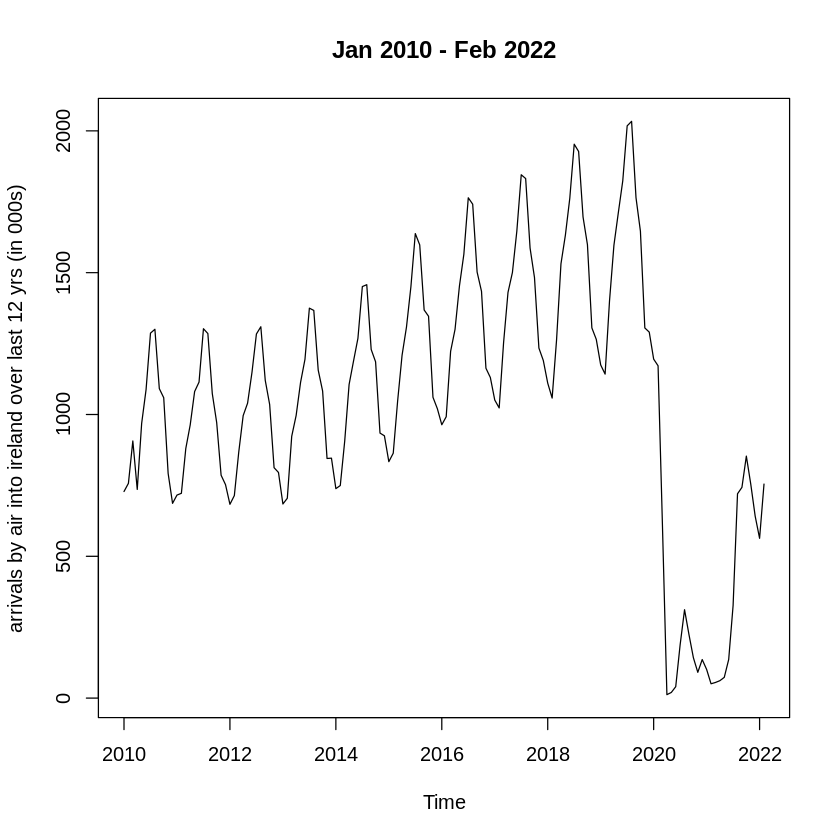

In [6]:
values = ts(values, start= 2010, frequency = 12)

ts.plot(values, main= 'Jan 2010 - Feb 2022', ylab= 'arrivals by air into ireland over last 12 yrs (in 000s)')

**We can see from the plot above that the number of travellers into Ireland had been increasing consistently with each year's peak number of travellers being every summer.**

**But then we notice a very rapid drop in the number of travellers at around the 110-120th month (which is approx = 9/10 years) when the covid 19 pandemic begins, in 2019/2020.**
**The number of travellers into Ireland is again beginning to rise from the start of 2022.**

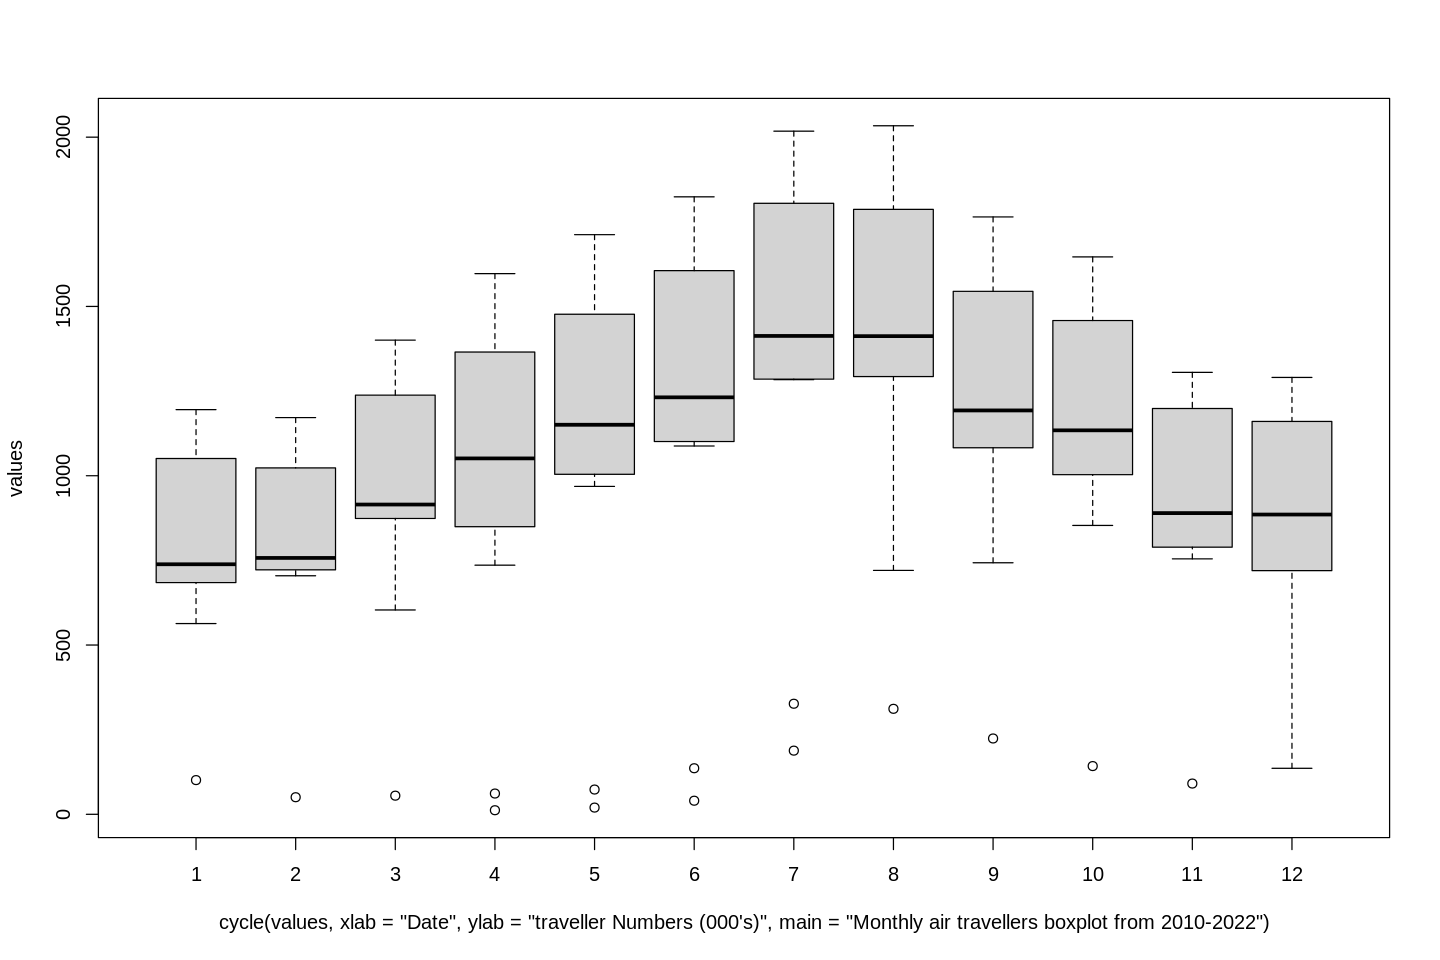

In [7]:
#Create a Box Plot by Cycle
options(repr.plot.width=12, repr.plot.height=8)
boxplot(values~cycle(values, xlab="Date", ylab = "traveller Numbers (000's)", main = "Monthly air travellers boxplot from 2010-2022"))

**This boxplot illustrates what we mentioned above, that the number of people arriving into ireland increases during the summer months (June, July, August)** 

**This is because these are the months that young people in educataion have their summer breaks and because the weather during these times would be most suitable for a holiday**

In [8]:
summary(values)

     VALUE       
 Min.   :  12.1  
 1st Qu.: 787.4  
 Median :1098.5  
 Mean   :1063.8  
 3rd Qu.:1337.0  
 Max.   :2033.6  

**Smoothing the data**

**We will now analyse the trend**

We will estimate the trend using a moving average

In [10]:
time.pts = c(1:length(values))
time.pts

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146

In [11]:
time.pts = c(time.pts - min(time.pts))/max(time.pts)

**Fitting a moving average**

In [12]:
mav.fit = ksmooth(time.pts, values, kernel = "box")

In [13]:
head(mav.fit$y,20)

[1]  960.5135  953.7789  952.9949  954.0825  957.9561  963.5857  973.1512
 [8]  982.1000  985.9756  988.0761  985.0298  982.1333  977.1612  972.6080
[15]  971.2902  973.8769  977.9208  983.3037  991.8073 1000.1250

In [14]:
values.fit.mav = ts(mav.fit$y,start=2010,frequency=12)

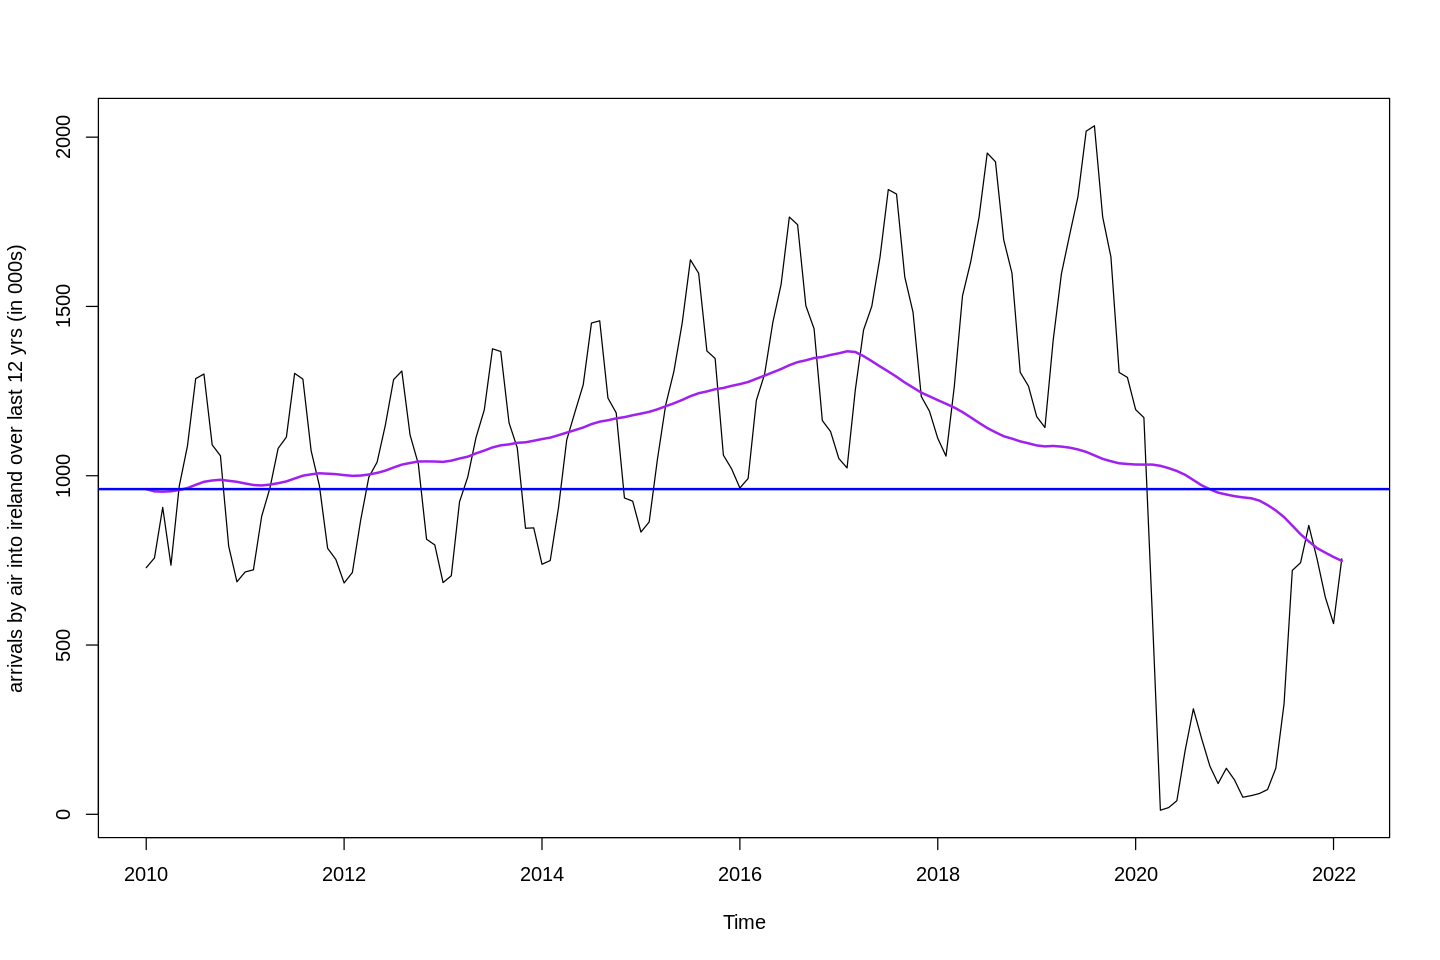

In [15]:
ts.plot(values,ylab="arrivals by air into ireland over last 12 yrs (in 000s)")
lines(values.fit.mav,lwd=2,col="purple")
abline(values.fit.mav[1],0,lwd=2,col="blue")

**Parametric regression**

In [16]:
x1 = time.pts
x2 = time.pts^2

In [17]:
lm.fit = lm(values~x1+x2)
summary(lm.fit)


Call:
lm(formula = values ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-862.66 -282.32   -7.89  262.56 1029.57 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   601.35      95.12   6.322 3.09e-09 ***
x1           3194.87     442.56   7.219 2.84e-11 ***
x2          -3407.05     431.28  -7.900 6.76e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 388.4 on 143 degrees of freedom
Multiple R-squared:  0.3134,	Adjusted R-squared:  0.3038 
F-statistic: 32.64 on 2 and 143 DF,  p-value: 2.101e-12


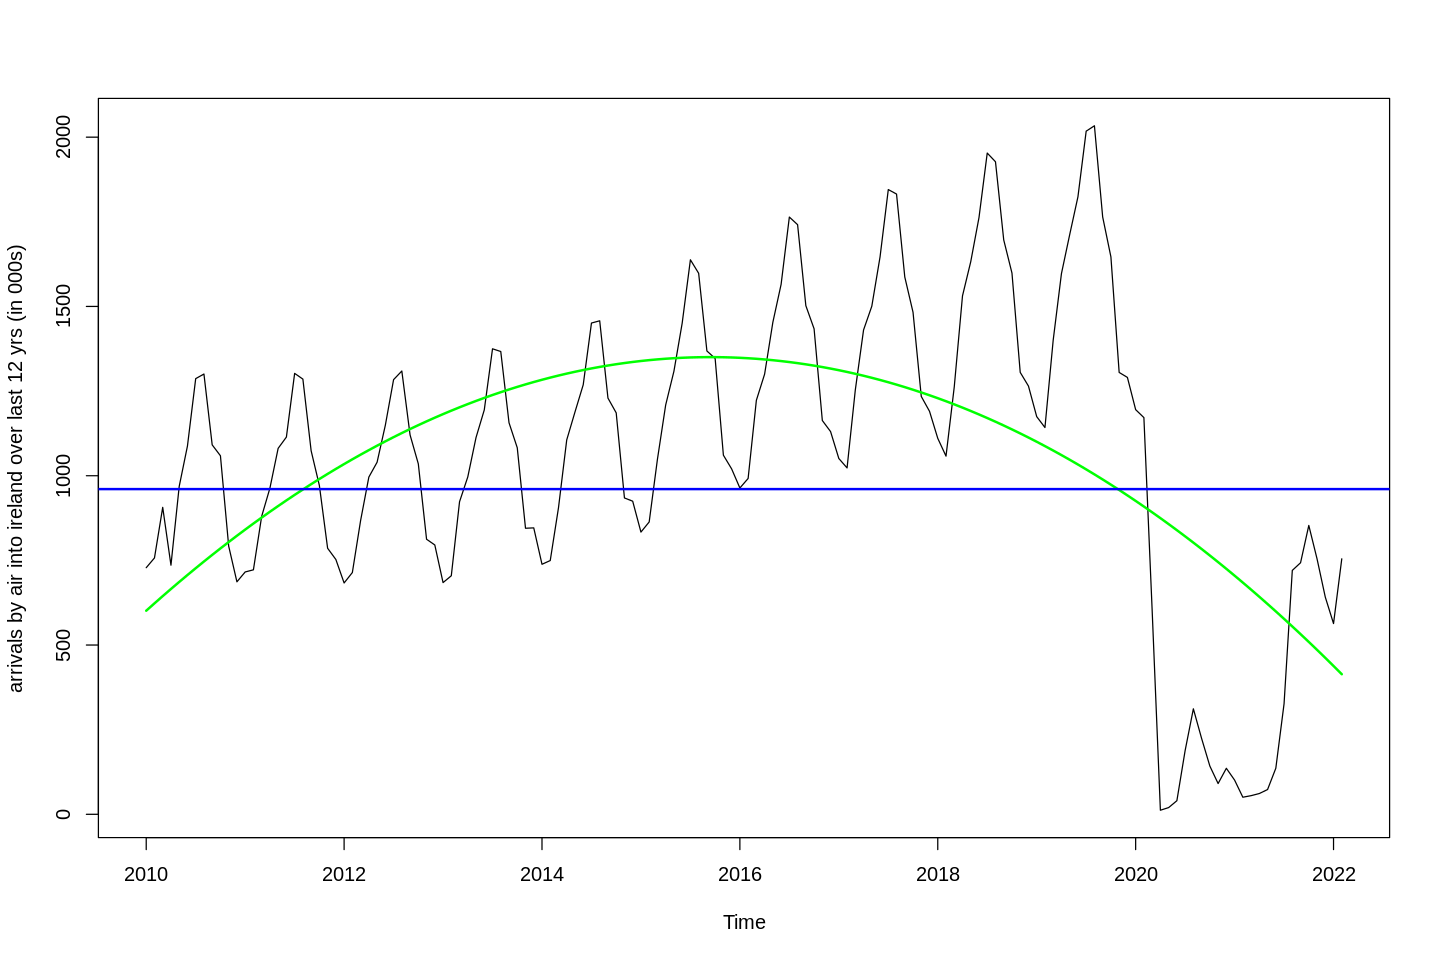

In [18]:
values.fit.lm = ts(fitted(lm.fit),start=2010,frequency=12)

ts.plot(values,ylab="arrivals by air into ireland over last 12 yrs (in 000s)")
lines(values.fit.lm,lwd=2,col="green")
abline(values.fit.mav[1],0,lwd=2,col="blue")

**Non parametric regression.**
**Fitting the trend and local polynomial trend estimation.**

In [19]:
loc.fit = loess(values~time.pts)
values.fit.loc = ts(fitted(loc.fit),start=2010,frequency=12)

**Splines trend estimation**

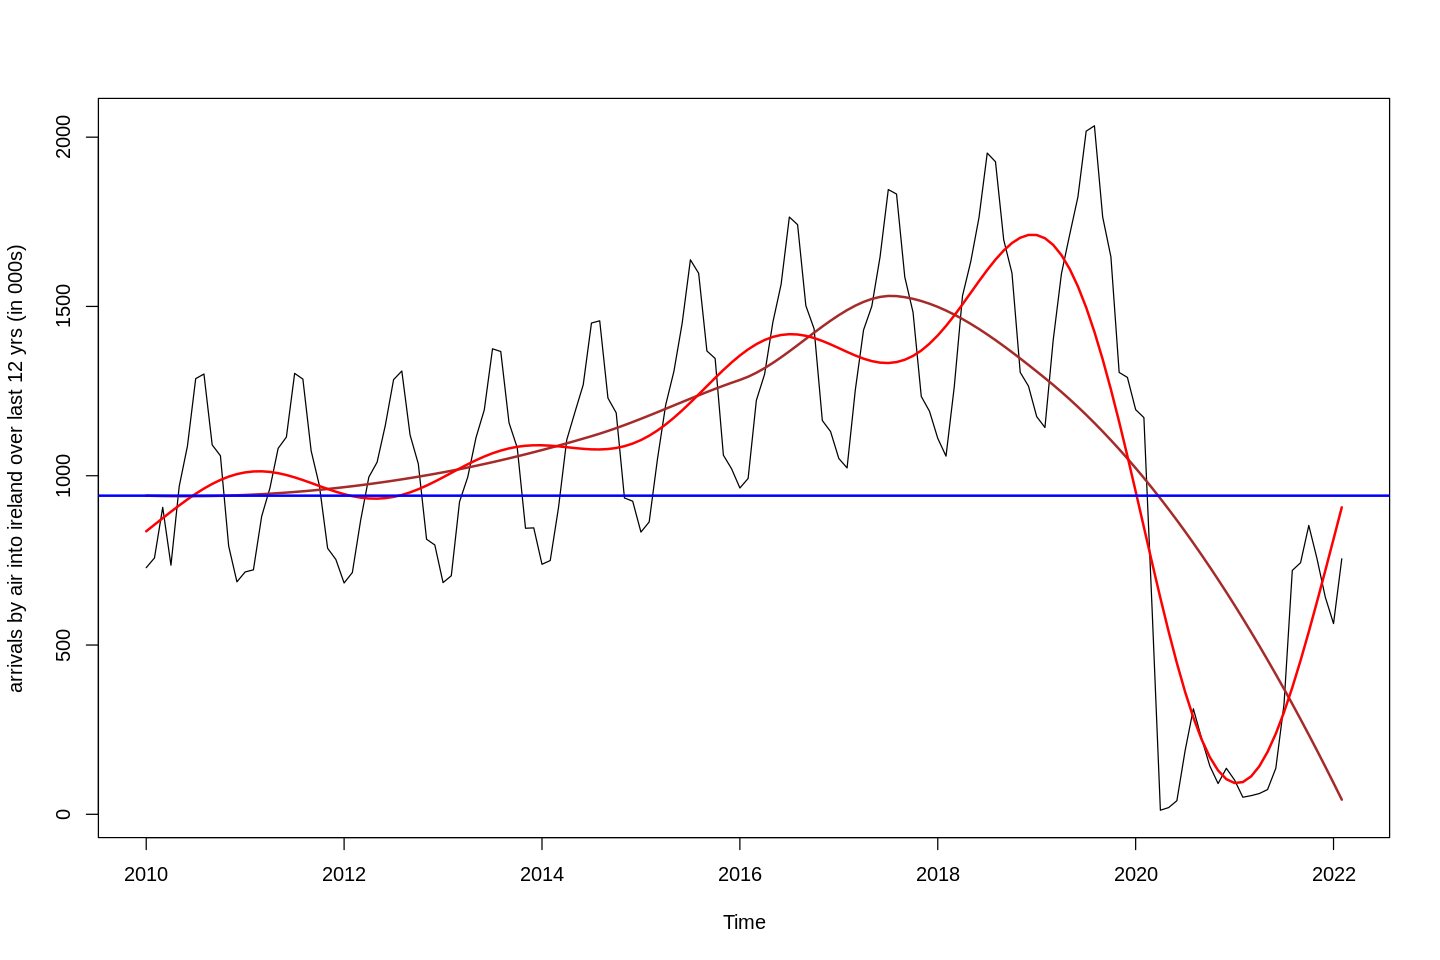

In [20]:
gam.fit = gam(values~s(time.pts))
values.fit.gam = ts(fitted(gam.fit),start=2010,frequency=12)

ts.plot(values,ylab="arrivals by air into ireland over last 12 yrs (in 000s)")
lines(values.fit.loc,lwd=2,col="brown")
lines(values.fit.gam,lwd=2,col="red")
abline(values.fit.loc[1],0,lwd=2,col="blue")

**We will now compare all the estimated trends**

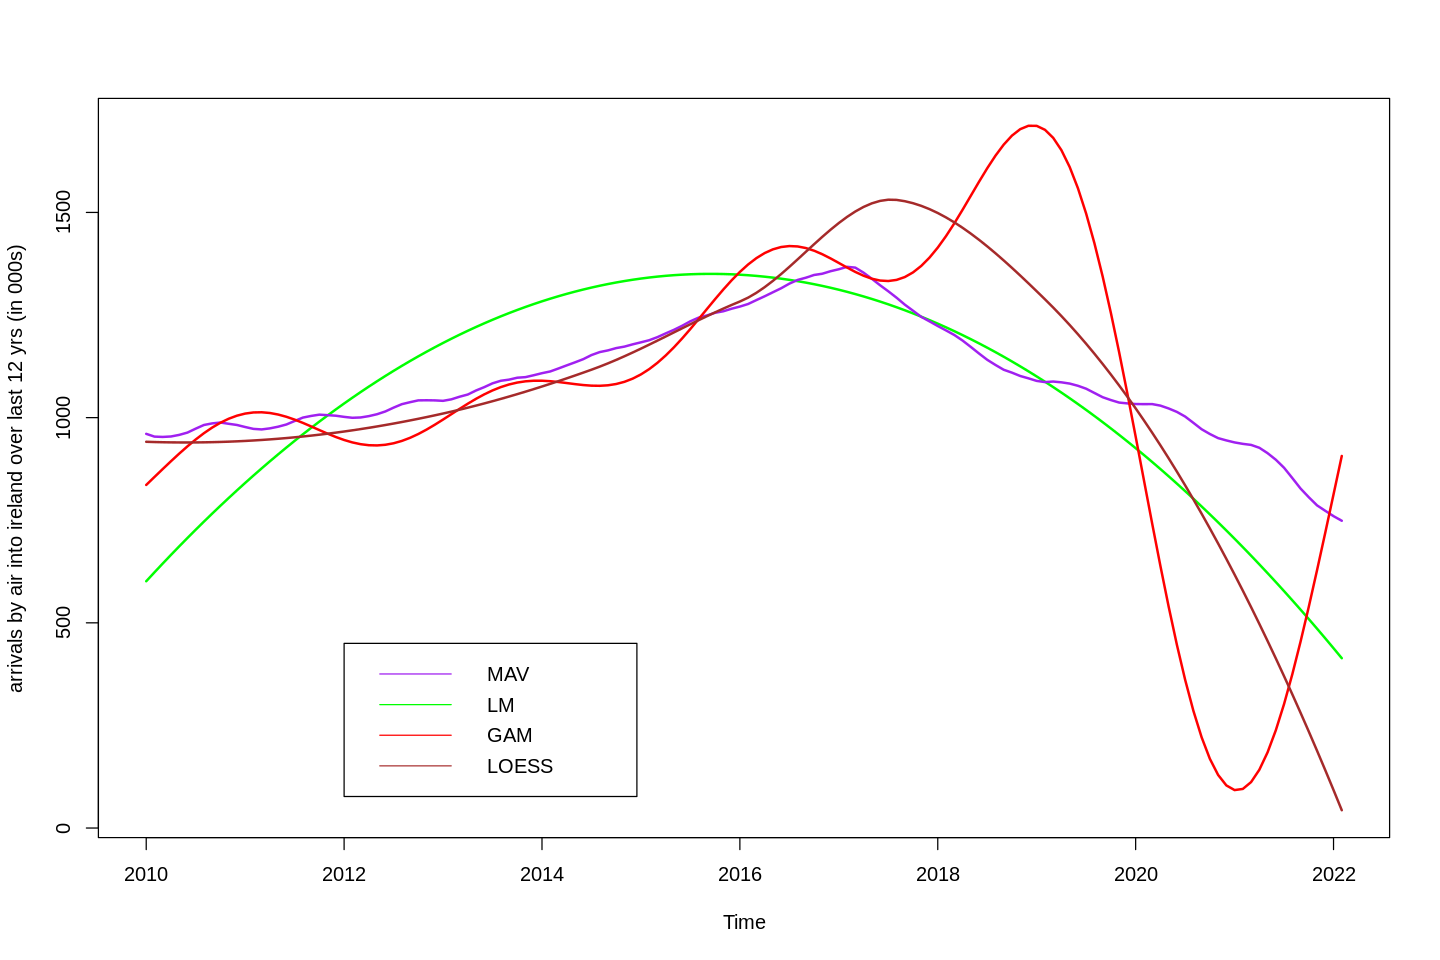

In [21]:
all.val = c(values.fit.mav,values.fit.lm,values.fit.gam,values.fit.loc)
ylim= c(min(all.val),max(all.val))

ts.plot(values.fit.lm,lwd=2,col="green",ylim=ylim,ylab="arrivals by air into ireland over last 12 yrs (in 000s)")
lines(values.fit.mav,lwd=2,col="purple")
lines(values.fit.gam,lwd=2,col="red")
lines(values.fit.loc,lwd=2,col="brown")
legend(x=2012,y=450,legend=c("MAV","LM","GAM","LOESS"),lty = 1, col=c("purple","green","red","brown"))

**This time series is additive because the seasonal variations do not significantly change over time with the exception of 2019/2020 when the covid 19 pandemic hit.**

**We will now decompose the data**

**After decomposing the time series we will have extracted the seasonal component in the data and remove the seasonality which makes an Arima process more appliable to the time series.**

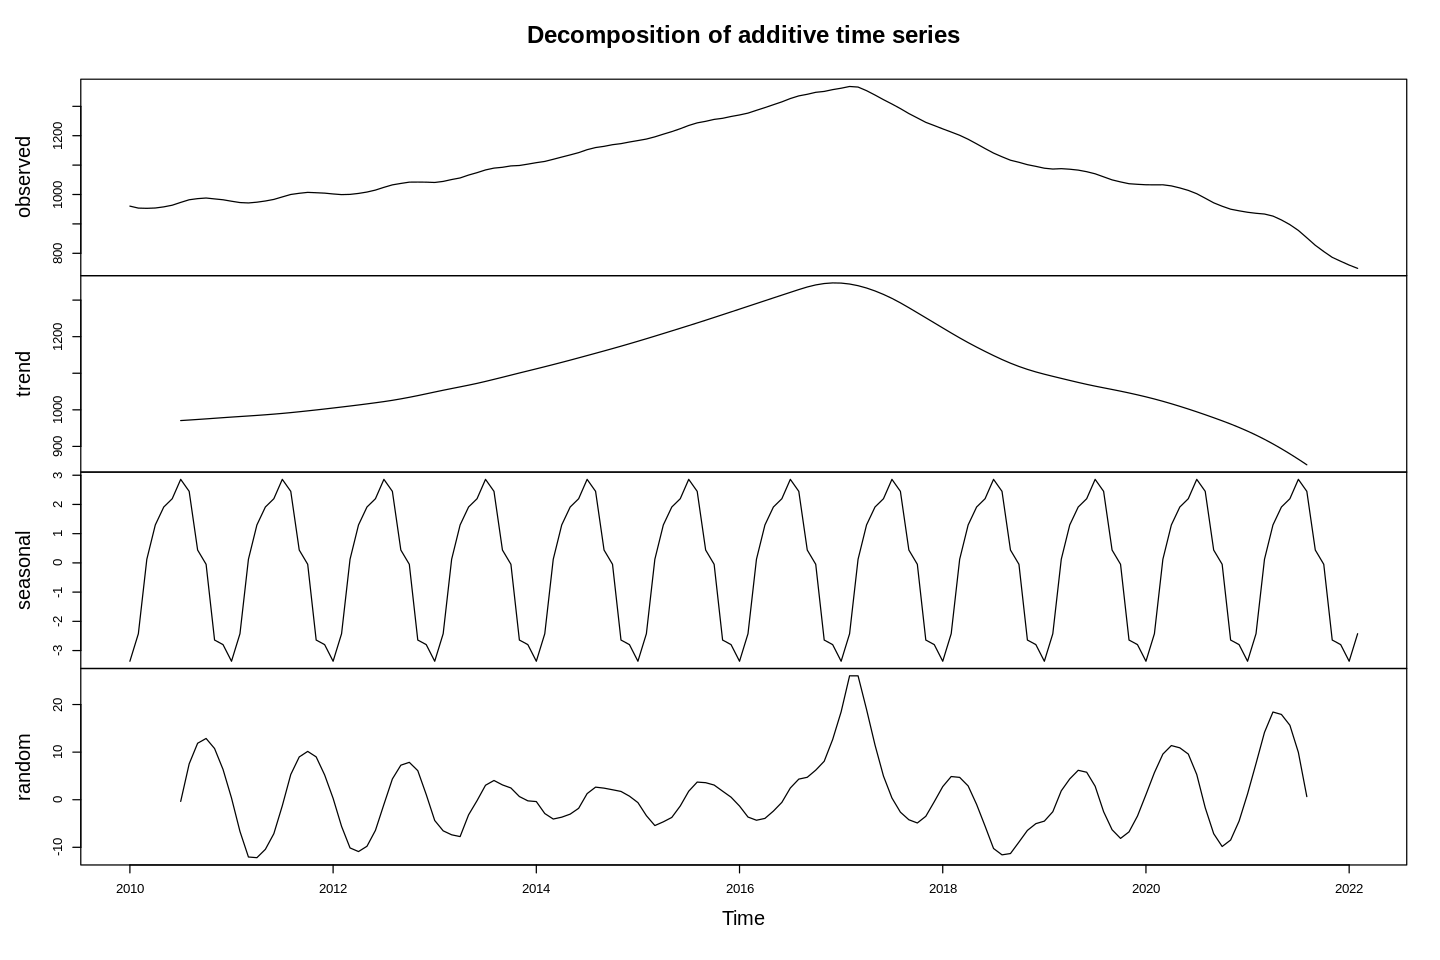

In [22]:
values.ma.decomp = decompose(values.fit.mav, type=c("additive"))
plot(values.ma.decomp)

**We will now check the stationarity of the data**

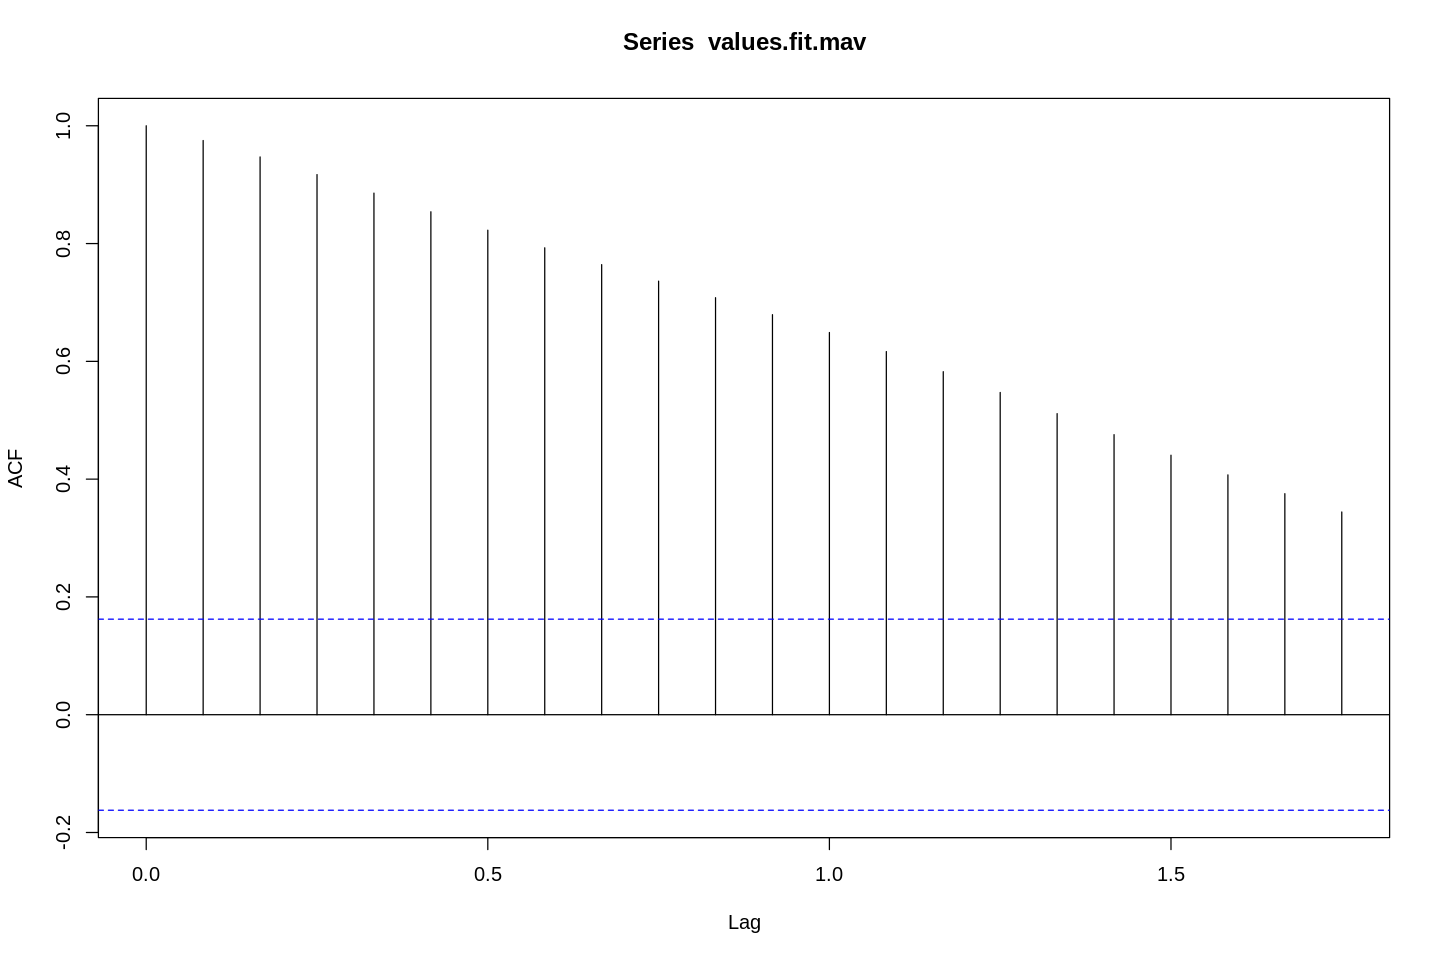

In [23]:
values.fit.mav <- ts(na.omit(values.fit.mav), frequency=12, start=c(2008, 1))
acf(values.fit.mav)

**The data is not stationary. We can see that the mean and the variance clearly change over time. We can also make this conclusion based on the fact that the values smoothly decay and there are not sharp drops.**

**In order to make the data suitable for ARIMA models, we will transform our data to be more stationary**

In [24]:
adf.test(values.fit.mav)

Warning message in adf.test(values.fit.mav):
“p-value greater than printed p-value”



	Augmented Dickey-Fuller Test

data:  values.fit.mav
Dickey-Fuller = 0.20059, Lag order = 5, p-value = 0.99
alternative hypothesis: stationary


**Making the data stationary** 

**transform: Differencing**

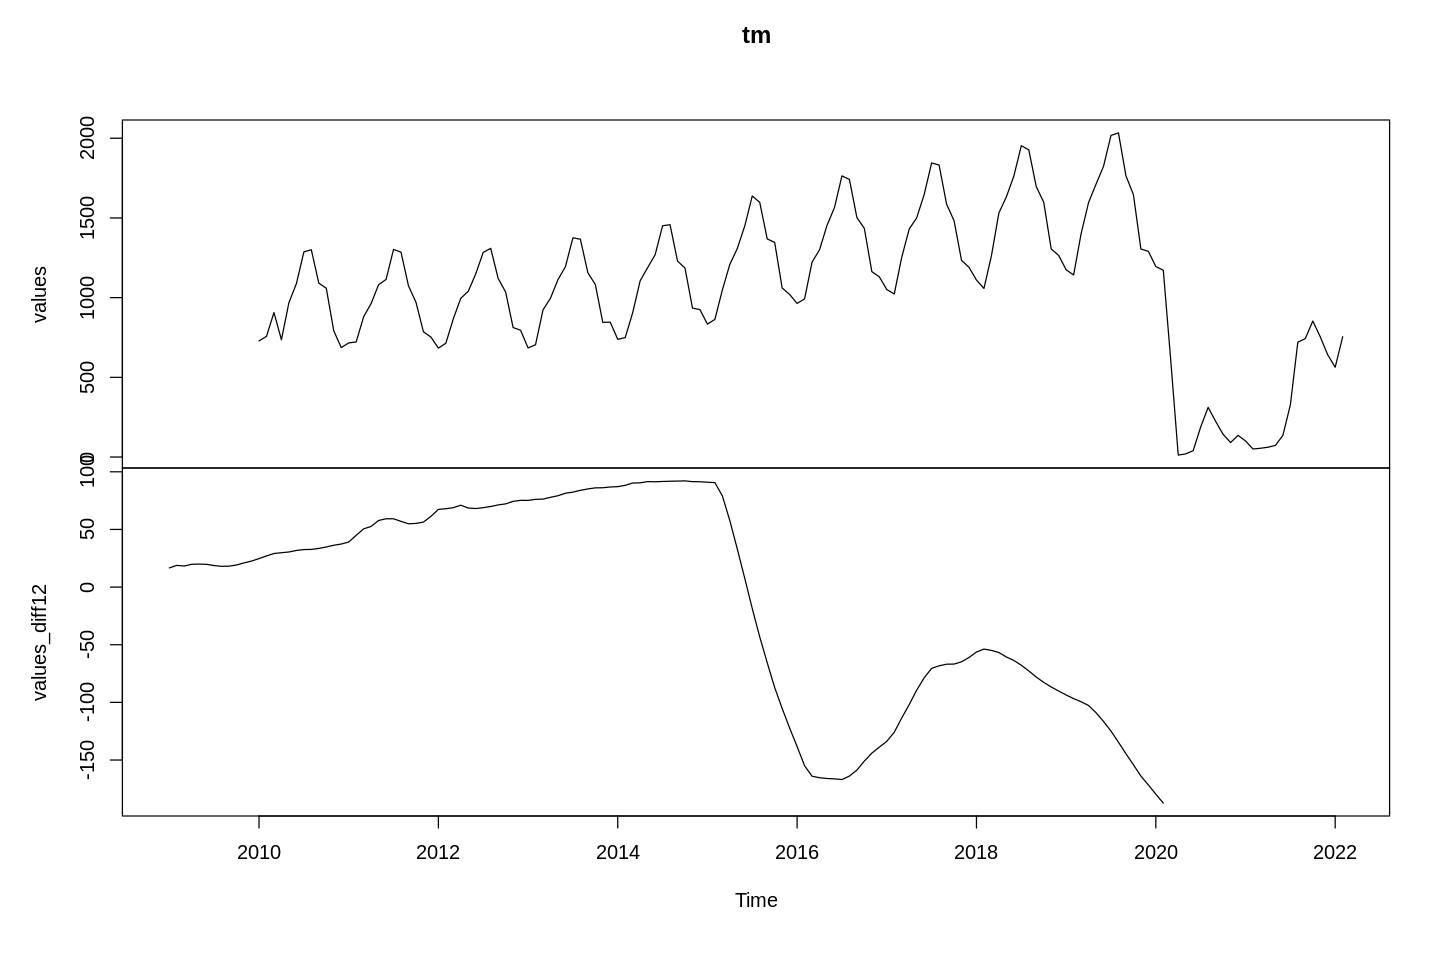

In [26]:
#seasonal differencing
values_diff12 = diff(values.fit.mav, lag = 12)
tm <- cbind(values, values_diff12)
plot(tm)

**There still appears to be trend so we will take the first difference**

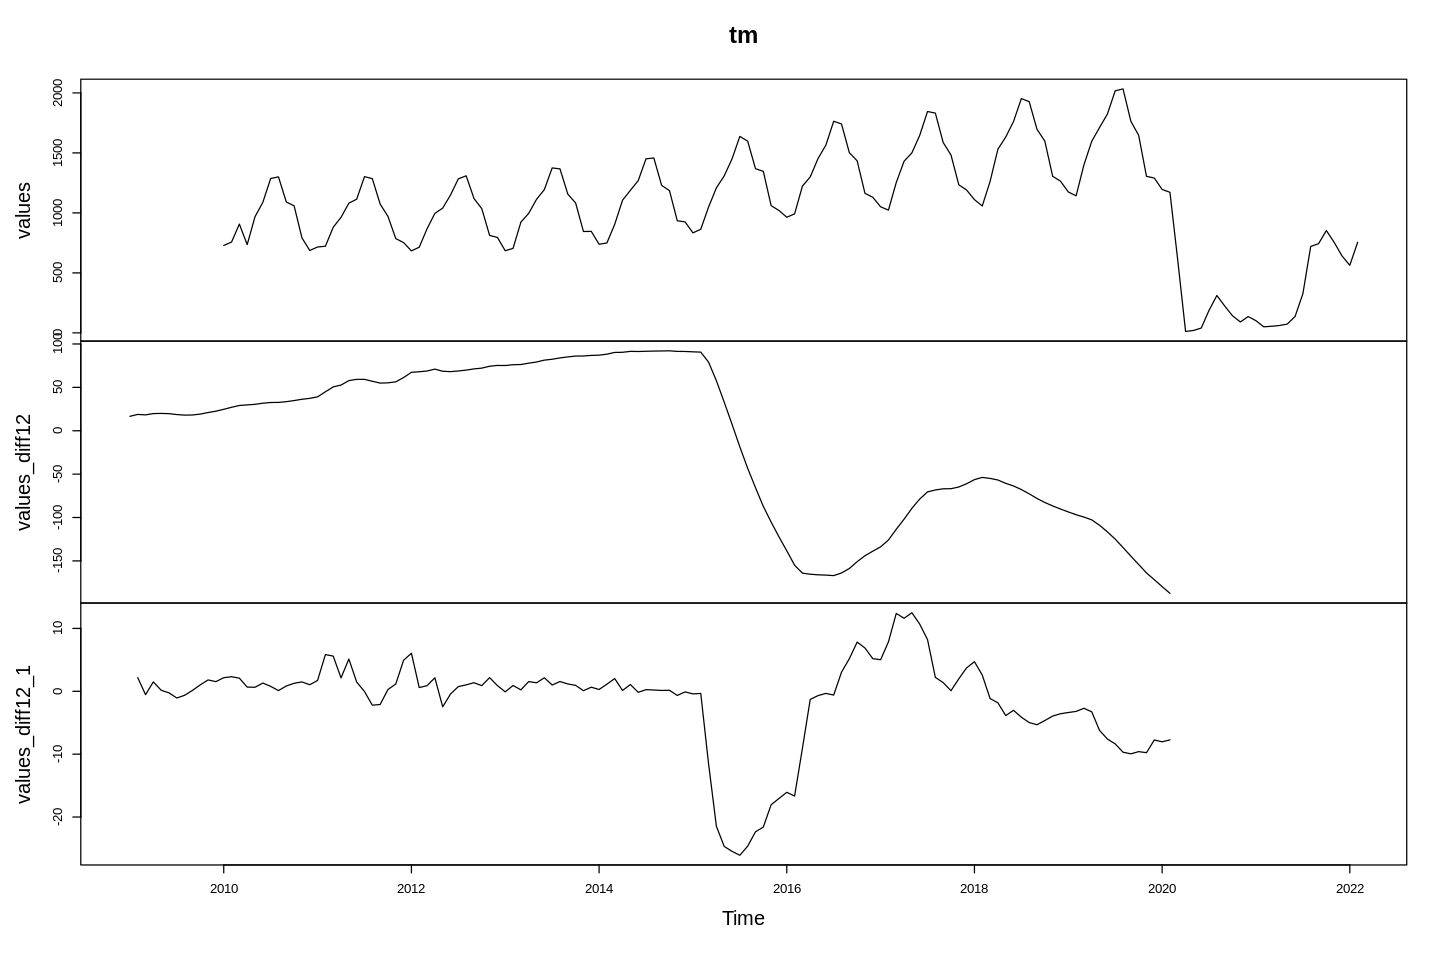

In [27]:
values_diff12_1 = diff(values_diff12)
tm <- cbind(values, values_diff12, values_diff12_1)
plot(tm)

**It appears now that the trend has been removed. We will use an acf plot and the Augmented Dickey-Fuller Test to confirm if the data is stationary**

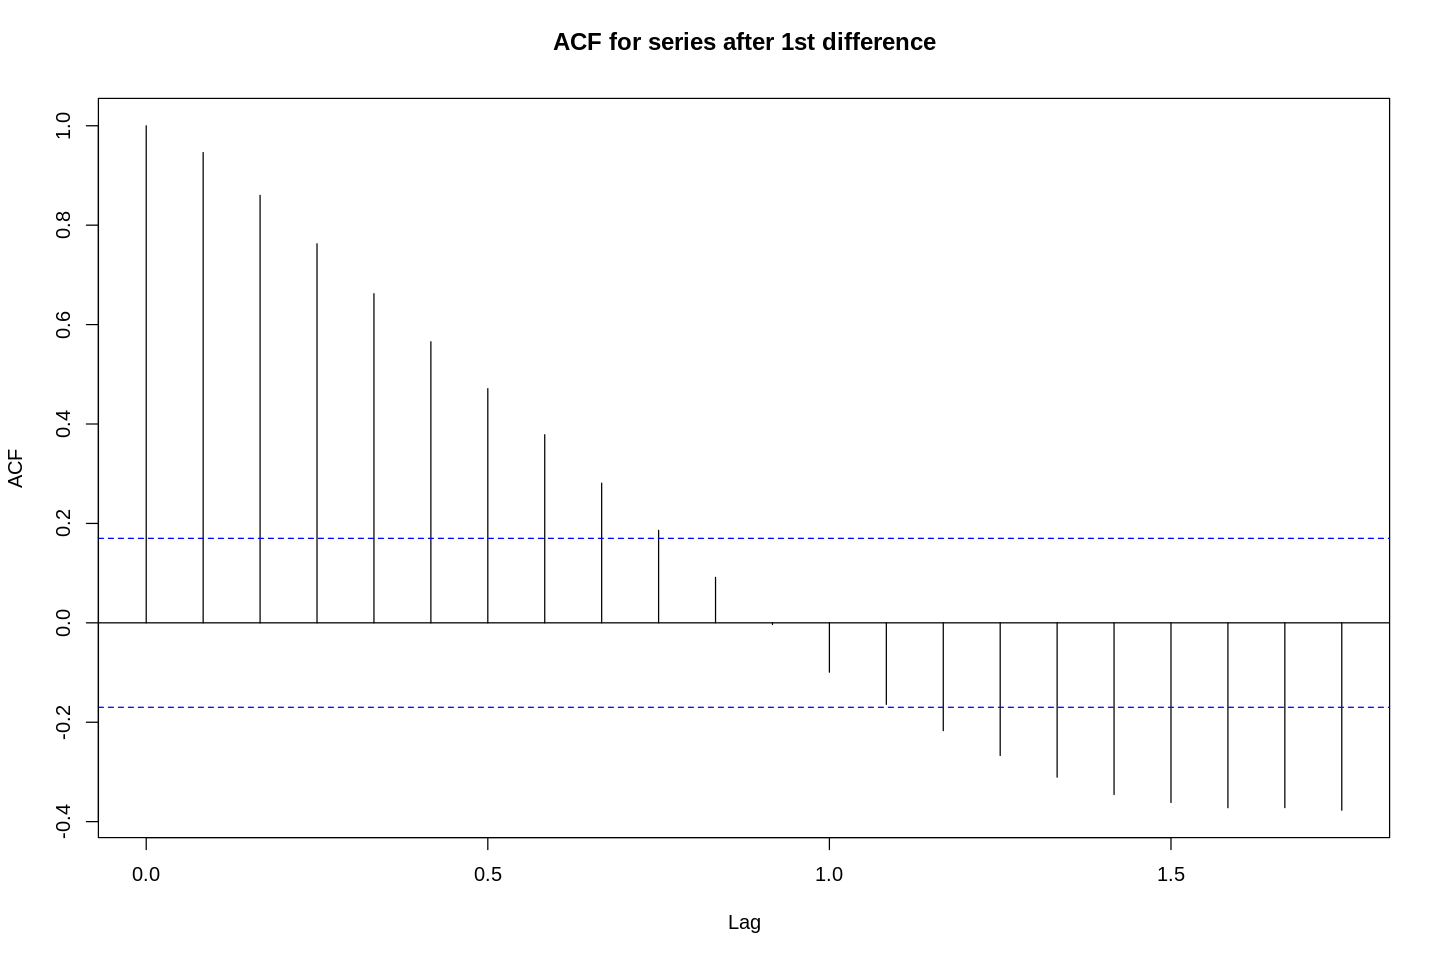

In [28]:
acf(na.omit(values_diff12_1), main="ACF for series after 1st difference")

In [29]:
adf.test(na.omit(values_diff12_1))


	Augmented Dickey-Fuller Test

data:  na.omit(values_diff12_1)
Dickey-Fuller = -2.8131, Lag order = 5, p-value = 0.2383
alternative hypothesis: stationary


**The results of the ACF and ADF tests go against what we percieved the stationarity of the data to be. They both confirm that the data is still non-stationary (the p value from the ADF test is 0.23 > 0.05 and we notice trend in the ACF test)even after the first difference so we will take the second differnce. Then we will once again use the ACF and ADF tests**



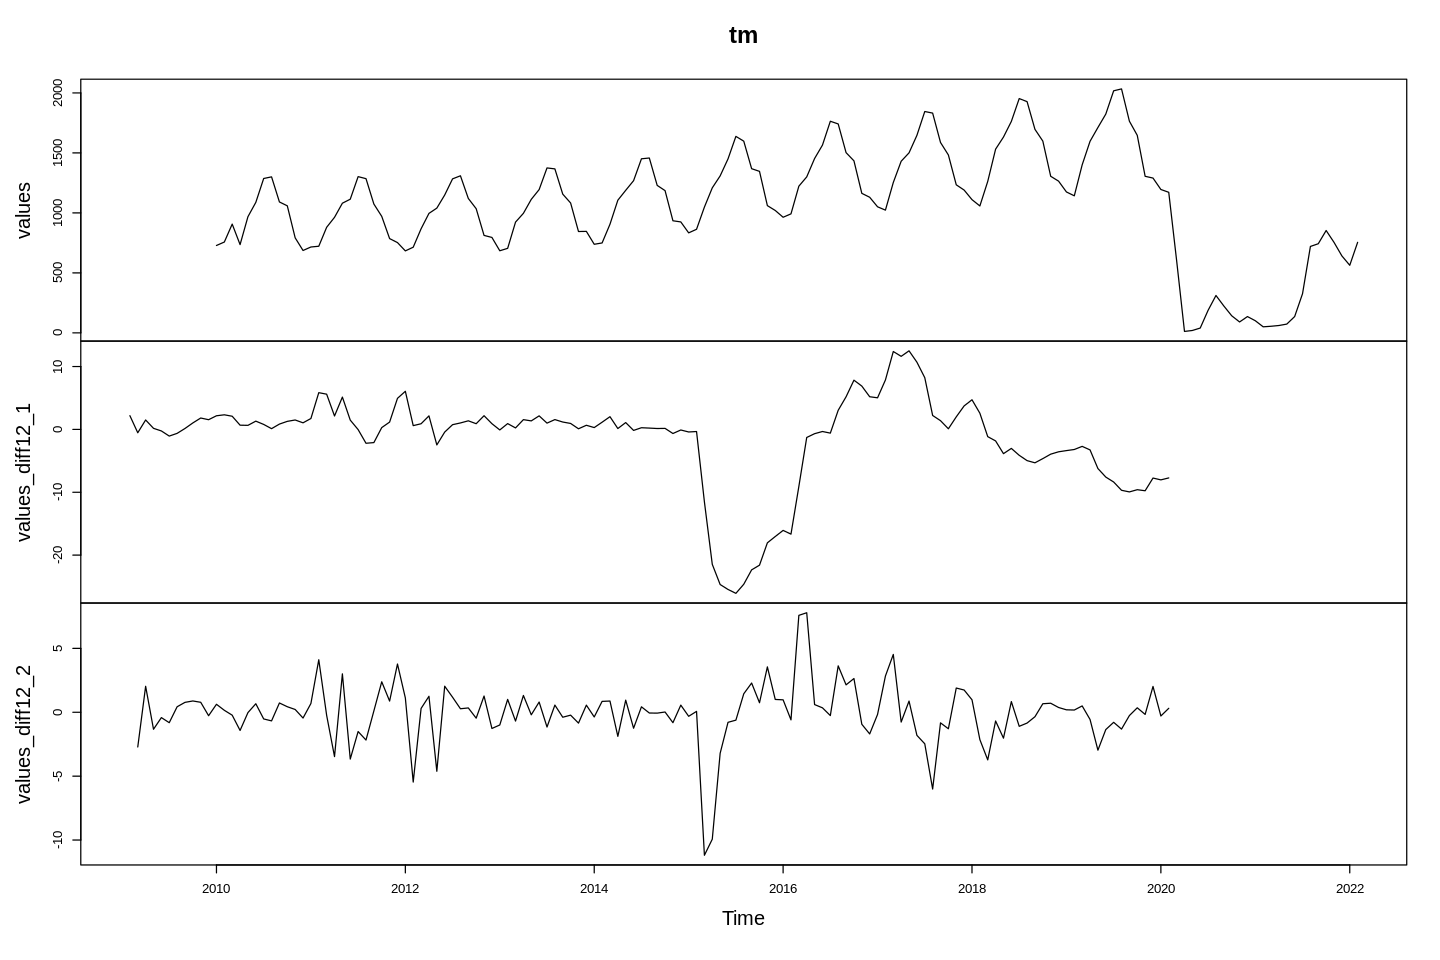

In [30]:
values_diff12_2 = diff(values_diff12_1)
tm <- cbind(values, values_diff12_1, values_diff12_2)
plot(tm)

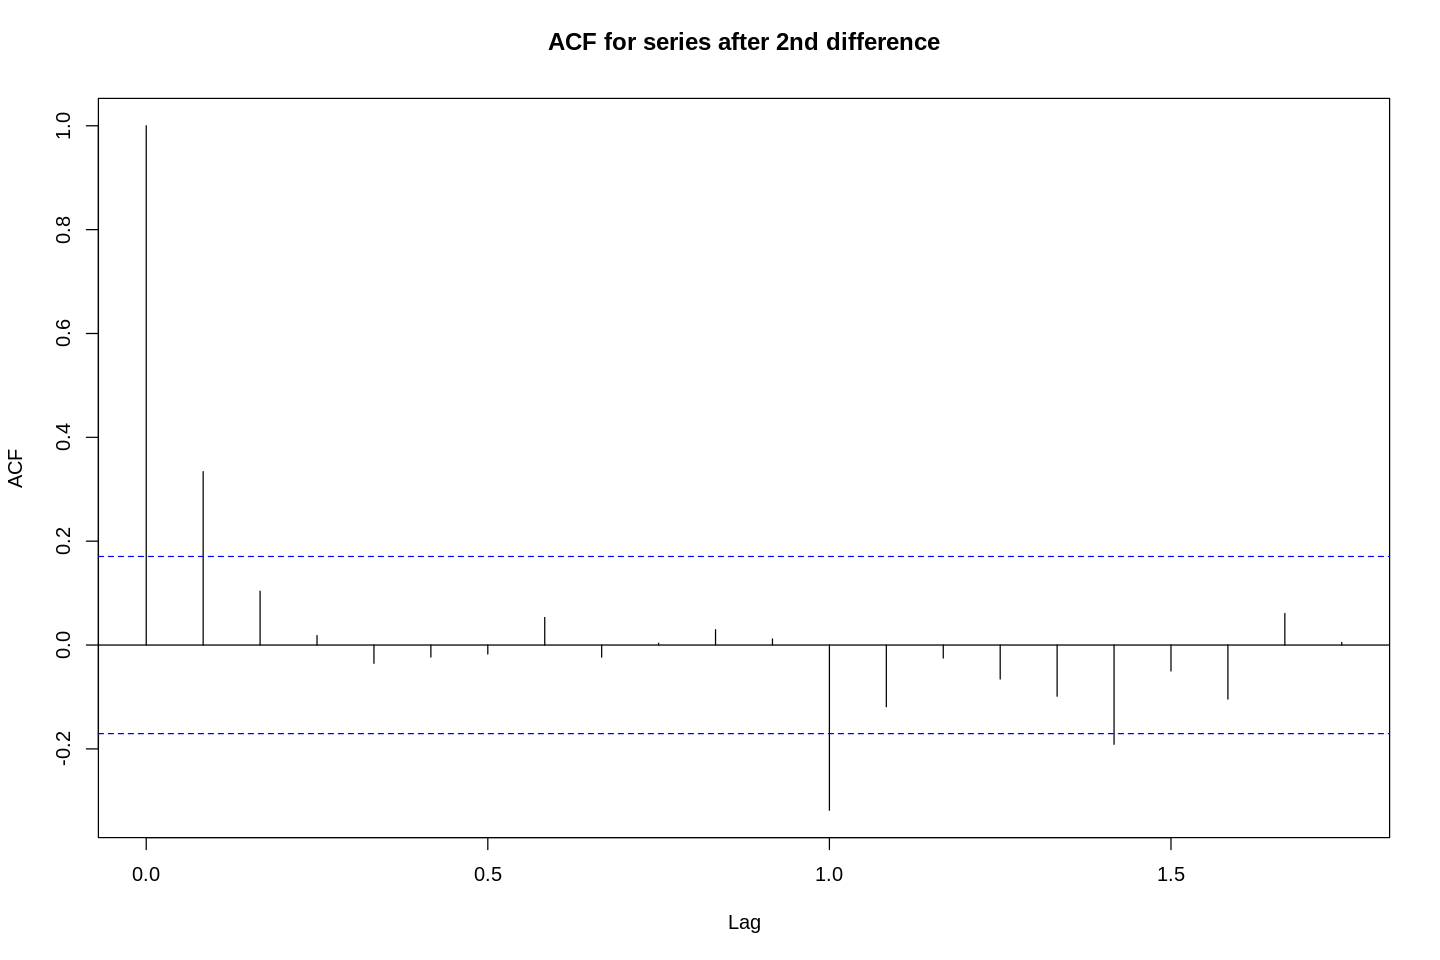

In [31]:
acf(na.omit(values_diff12_2), main="ACF for series after 2nd difference")

In [33]:
adf.test(na.omit(values_diff12_2))

Warning message in adf.test(na.omit(values_diff12_2)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  na.omit(values_diff12_2)
Dickey-Fuller = -4.2936, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


**The data is now stationary. We can see that the p-value from the ADF test is less than 0.01 which is enough proof that the data is now stationary after the second difference**

**We will now use SARIMA**

In [34]:
values.fit.sarima1 <- arima(values.fit.mav, order=c(1, 1, 0), seasonal = list(order = c(1, 1, 0), period = 12))
values.fit.sarima1


Call:
arima(x = values.fit.mav, order = c(1, 1, 0), seasonal = list(order = c(1, 1, 
    0), period = 12))

Coefficients:
         ar1     sar1
      0.9576  -0.3015
s.e.  0.0231   0.0804

sigma^2 estimated as 4.751:  log likelihood = -293.99,  aic = 593.98

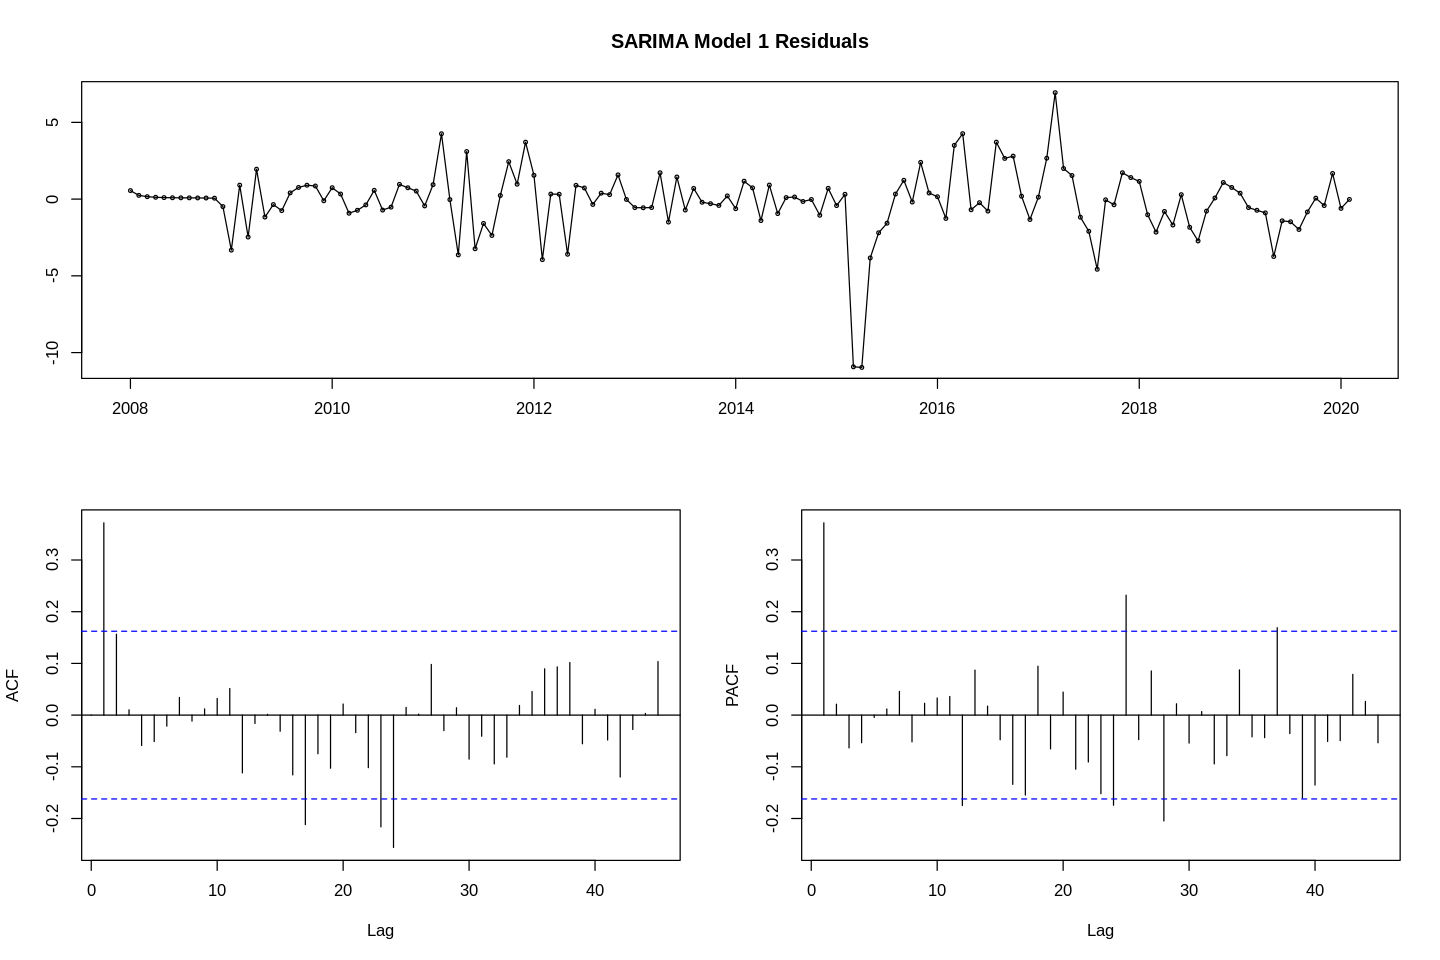

In [35]:
tsdisplay(residuals(values.fit.sarima1), lag.max=45, main='SARIMA Model 1 Residuals')

In [36]:
forecast.sarima1 <- forecast(values.fit.sarima1, h=12)
accuracy(forecast.sarima1)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.1501912,2.099533,1.308758,-0.01272062,0.1186509,0.01655637,0.3718113


**The results for 1 AR are not bad but we will have a look at 3 AR to see if there is improvement**

In [37]:
values.fit.sarima2 <- arima(values.fit.mav, order=c(3, 1, 0), seasonal = list(order = c(1, 1, 0), period = 12))
values.fit.sarima2


Call:
arima(x = values.fit.mav, order = c(3, 1, 0), seasonal = list(order = c(1, 1, 
    0), period = 12))

Coefficients:
         ar1      ar2      ar3     sar1
      1.3355  -0.3661  -0.0283  -0.3485
s.e.  0.0879   0.1438   0.0872   0.0799

sigma^2 estimated as 3.953:  log likelihood = -282.26,  aic = 574.51

In [38]:
forecast.sarima2 <- forecast(values.fit.sarima2, h=12)
accuracy(forecast.sarima2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.1435844,1.918628,1.246226,-0.01236573,0.1132719,0.01576531,-0.004578206


**There is a slight improvement as some values are closer to 0**

**We will now build an ARIMA model using the auto.arima() function**

In [39]:
mymodel <- auto.arima(values)
mymodel

Series: values 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
         ma1     sma1
      0.4545  -0.7503
s.e.  0.0737   0.1344

sigma^2 = 11483:  log likelihood = -814.47
AIC=1634.95   AICc=1635.13   BIC=1643.62

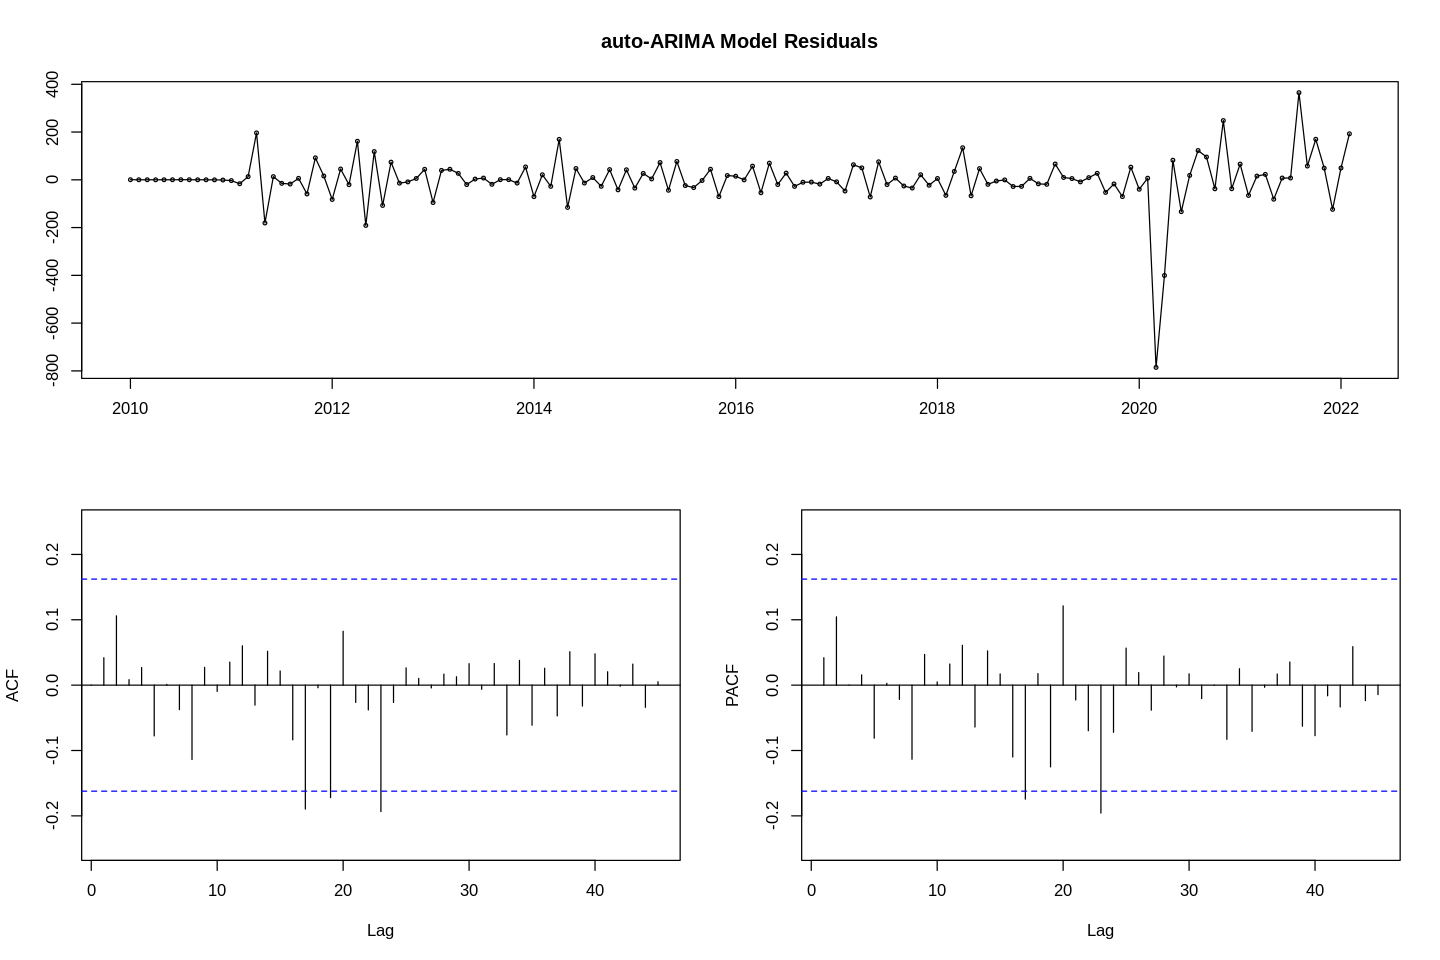

In [40]:
tsdisplay(residuals(mymodel), lag.max=45, main='auto-ARIMA Model Residuals')

**We will now use a different model: Exponential smoothing (Holt Winters)**

In [43]:
values.fit.hw1 <- ets(values.fit.mav, model="MAM", damped=FALSE)
values.fit.hw1

ETS(M,A,M) 

Call:
 ets(y = values.fit.mav, model = "MAM", damped = FALSE) 

  Smoothing parameters:
    alpha = 0.3093 
    beta  = 0.1345 
    gamma = 0.4433 

  Initial states:
    l = 950.5963 
    b = 6.9627 
    s = 1.0003 1.0037 1.0188 1.0056 0.9895 1.0015
           1.0103 1.0011 0.9963 0.9814 0.9941 0.9975

  sigma:  0.0101

     AIC     AICc      BIC 
1443.662 1448.443 1494.383 

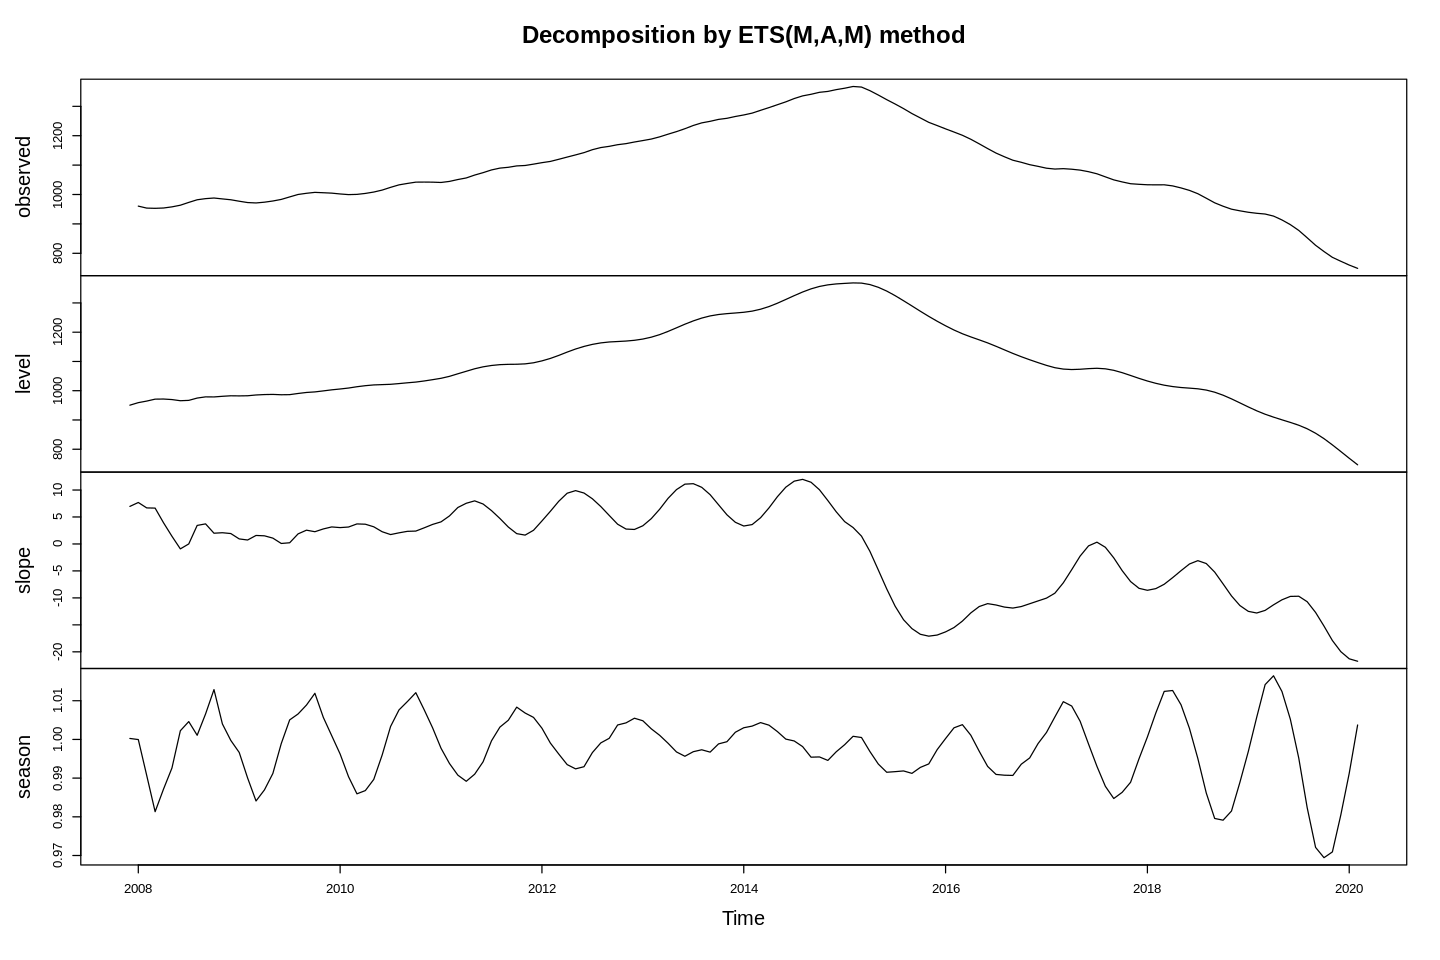

In [44]:
plot(values.fit.hw1)

In [45]:
accuracy(values.fit.hw1)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.462416,10.35054,8.45134,-0.1428519,0.7785451,0.1069132,0.8115411


In [47]:
values.fit.hw2 <- ets(values.fit.mav, model="MAM",
damped=TRUE)
values.fit.hw2

ETS(M,Ad,M) 

Call:
 ets(y = values.fit.mav, model = "MAM", damped = TRUE) 

  Smoothing parameters:
    alpha = 0.7244 
    beta  = 0.1094 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 953.2671 
    b = 5.0091 
    s = 0.9976 0.998 0.9999 0.9997 1.0033 1.0038
           1.0013 1.0016 1.0001 0.999 0.997 0.9985

  sigma:  0.0069

     AIC     AICc      BIC 
1332.796 1338.182 1386.501 

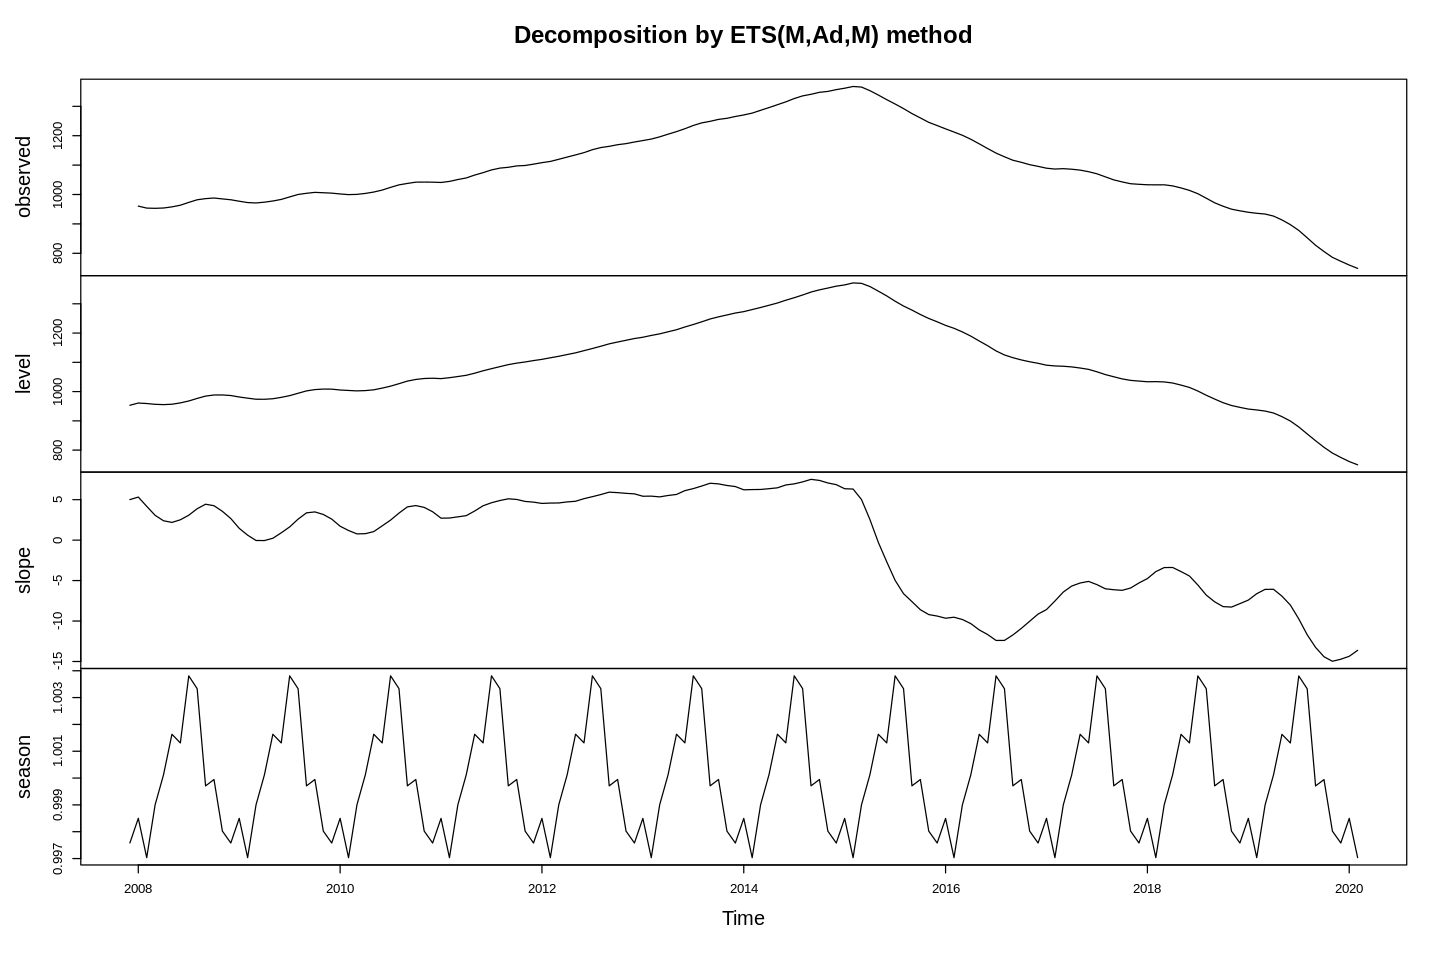

In [48]:
plot(values.fit.hw2)

In [49]:
accuracy(values.fit.hw2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.257301,6.960762,5.103536,-0.1195957,0.4808472,0.06456199,0.8624262


**We can see that there is an imporvement of the accuracy of the model when the trend component is damped.**

**We will evaluate the model and forecast the next 12 months**

#Accuracy
We will compare the real obseved values with the last 3 months in the dataset


In [54]:
data_2021_2022 <- read.csv('/content/seasonal_dataCSV.csv')

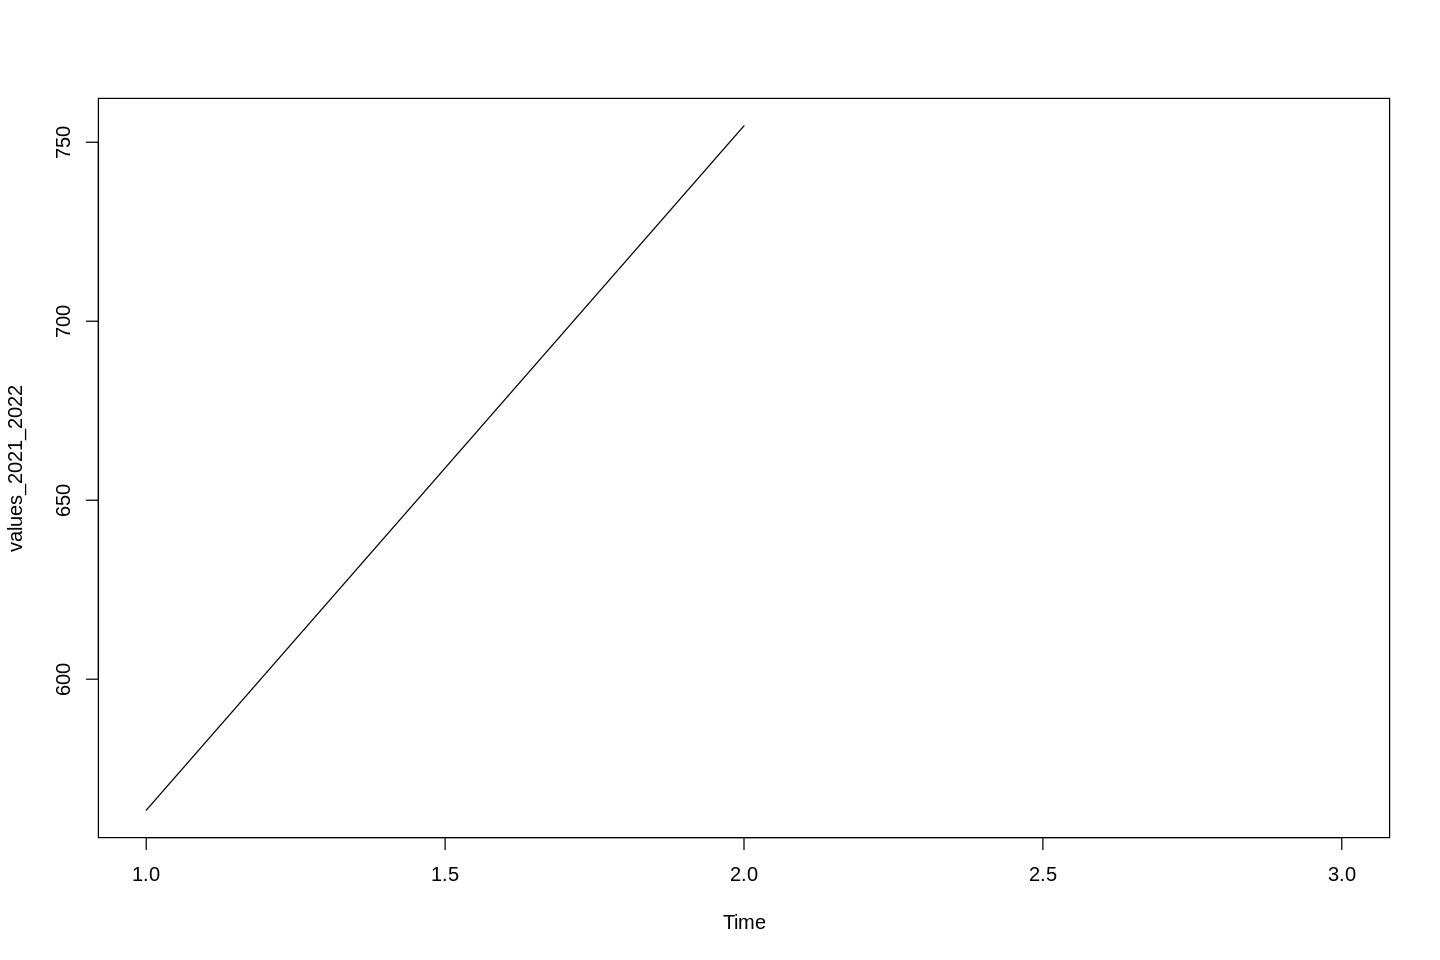

In [59]:
values_2021_2022 <- data_2021_2022[145:147, c('VALUE')]
plot.ts(values_2021_2022)

**Seasonal ARIMA: Forecasting the next 12 months using the chosen model (mymodel)**

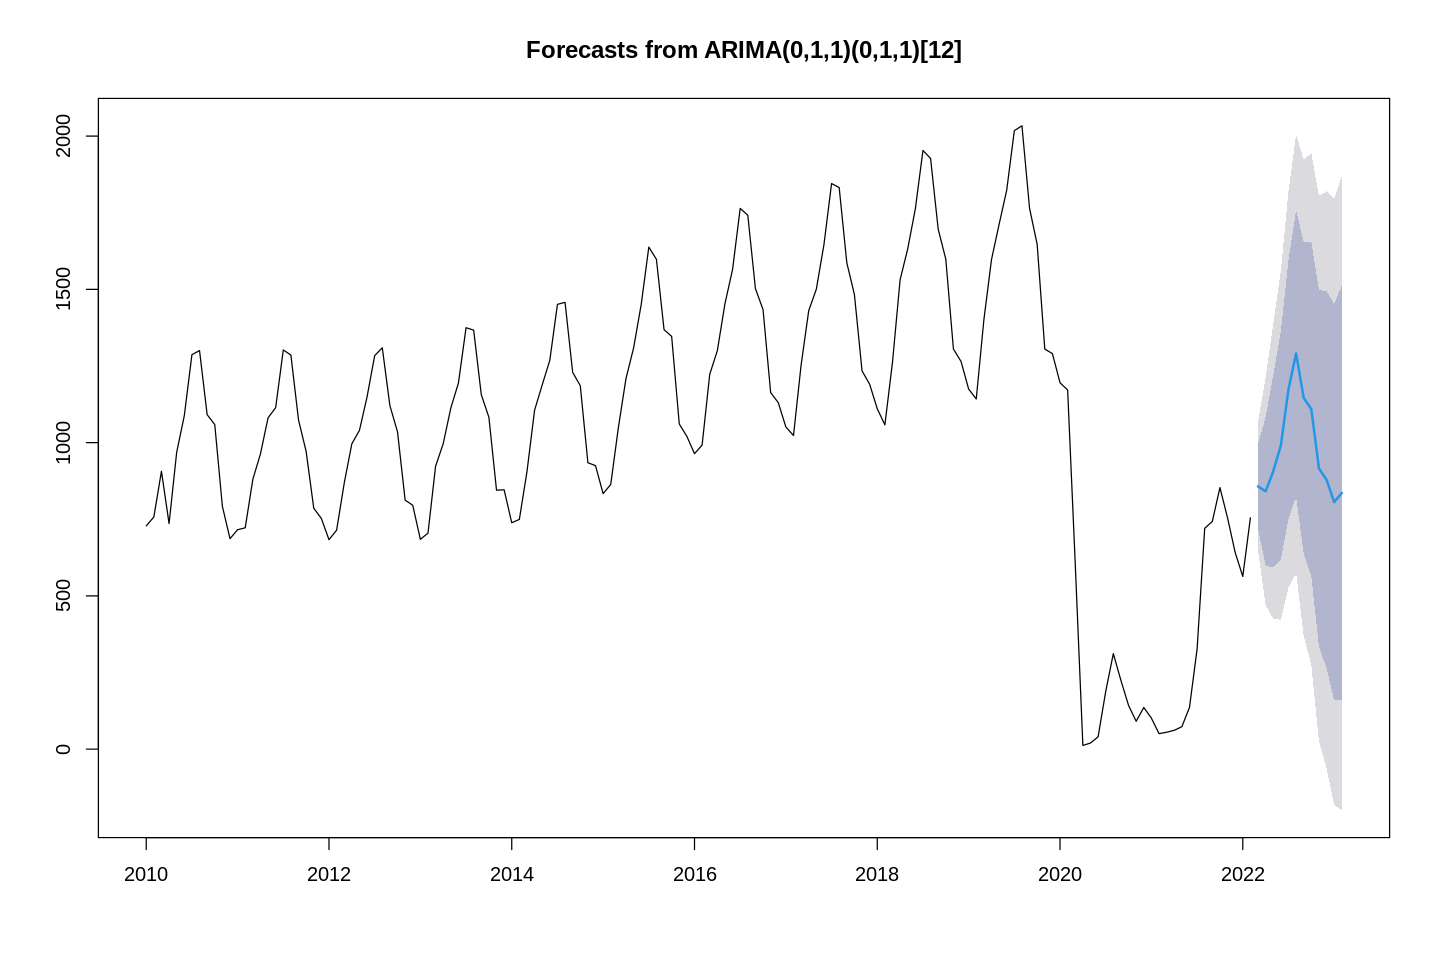

In [61]:
mymodel <- forecast(mymodel, h=12)
plot(mymodel)
lines(values_2021_2022, col="cyan", lwd=2, lty=3)

In [62]:
accuracy(mymodel, values_2021_2022)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.4645678,101.5061,53.05444,-20.80920,37.84405,0.4305788,0.04193028
Test set,-190.2277267,216.6248,190.22773,-31.81701,31.81701,1.5438488,NA


**We will test the alternative hypothesis to see if there are non-zero autocorrelations**

In [63]:
#test residuals
Box.test(residuals(mymodel), type="Ljung-Box")



	Box-Ljung test

data:  residuals(mymodel)
X-squared = 0.262, df = 1, p-value = 0.6087


##The P-value is >0.05
We therefore fail to reject the null hypothesis
**The null Hypothesis H0 is that the residuals are independently distributed**

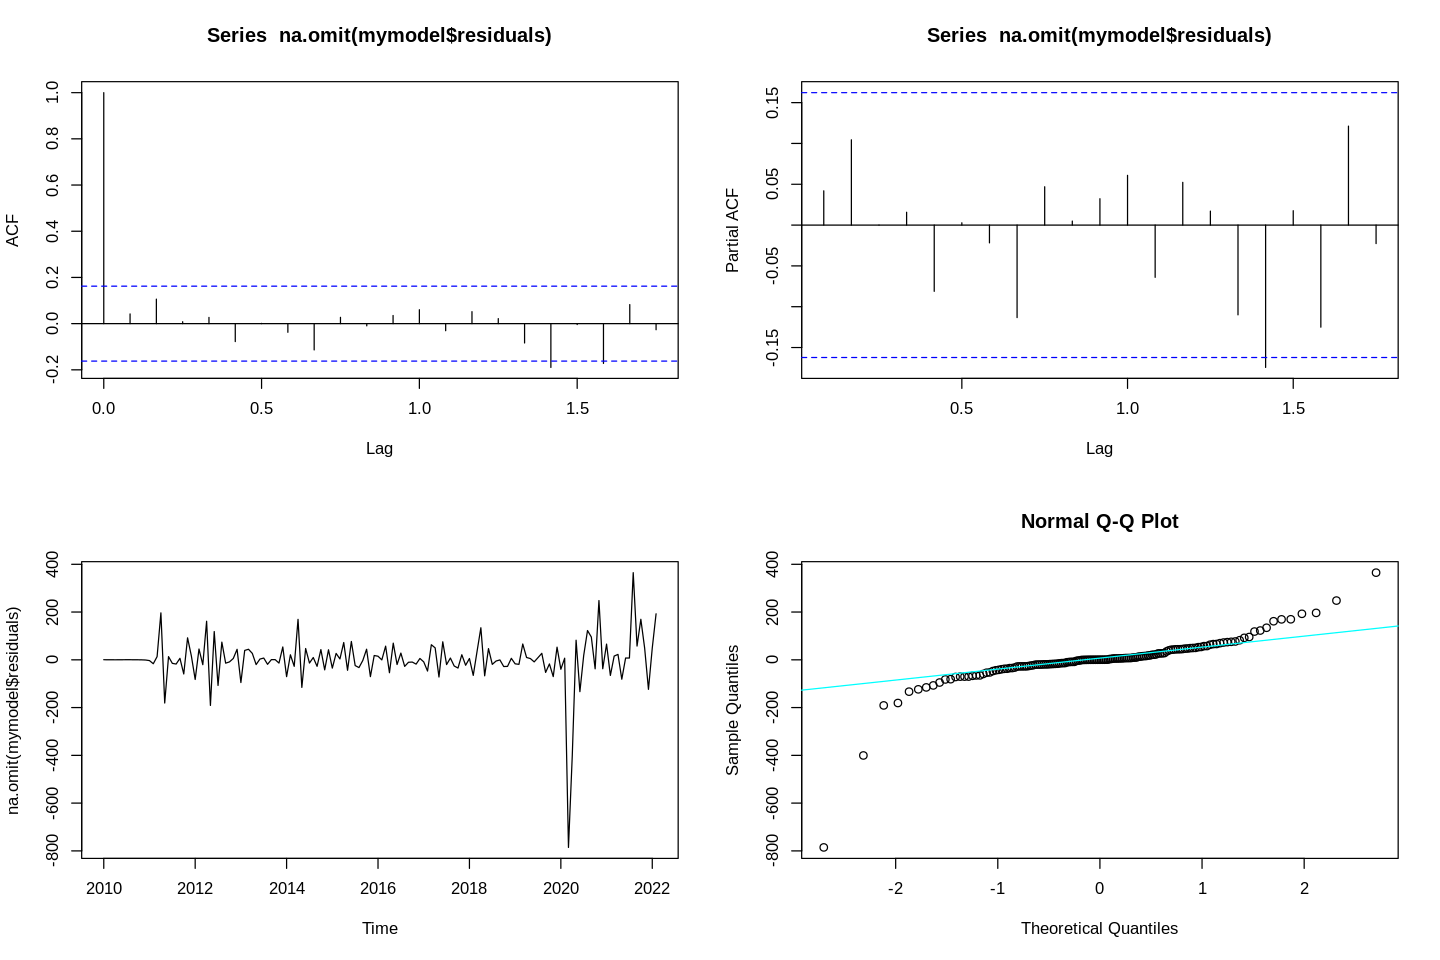

In [64]:
par(mfrow=c(2,2))
acf(na.omit(mymodel$residuals))
pacf(na.omit(mymodel$residuals))
plot(na.omit(mymodel$residuals))
qqnorm(na.omit(mymodel$residuals))
qqline(na.omit(mymodel$residuals), col="cyan")

**Holt Winters seasonal smoothing**

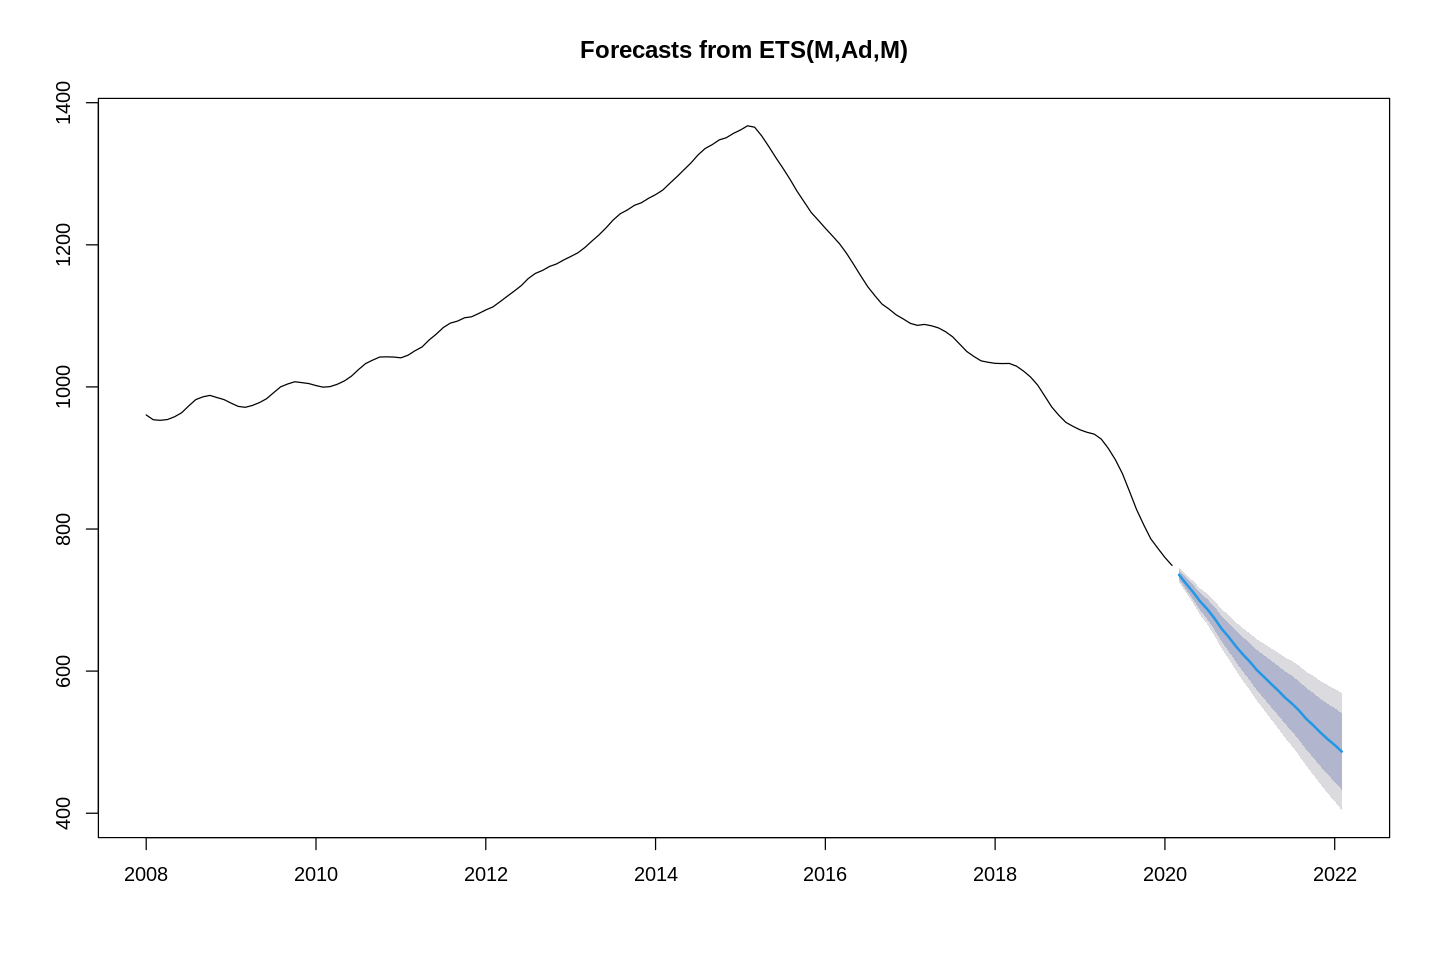

In [65]:
plot(forecast(values.fit.hw2))
lines(values_2021_2022, col="cyan", lwd=2, lty=3)

In [66]:
accuracy(forecast(values.fit.hw2), values_2021_2022)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.257301,6.960762,5.103536,-0.1195957,0.4808472,0.6755662,0.8624262
Test set,-70.212217,123.716639,101.862905,-13.1739494,17.3683157,13.4838171,NA


In [67]:
#test residuals
Box.test(residuals(values.fit.hw2), type="Ljung-Box")


	Box-Ljung test

data:  residuals(values.fit.hw2)
X-squared = 108.95, df = 1, p-value < 2.2e-16


##The P-value is < 0.05
We reject the null hypothesis while assuming a 5% chance of making a mistake.

**The alternative hypothesis is that the residuals are not independently distributed and exhibit a serial correlation.**

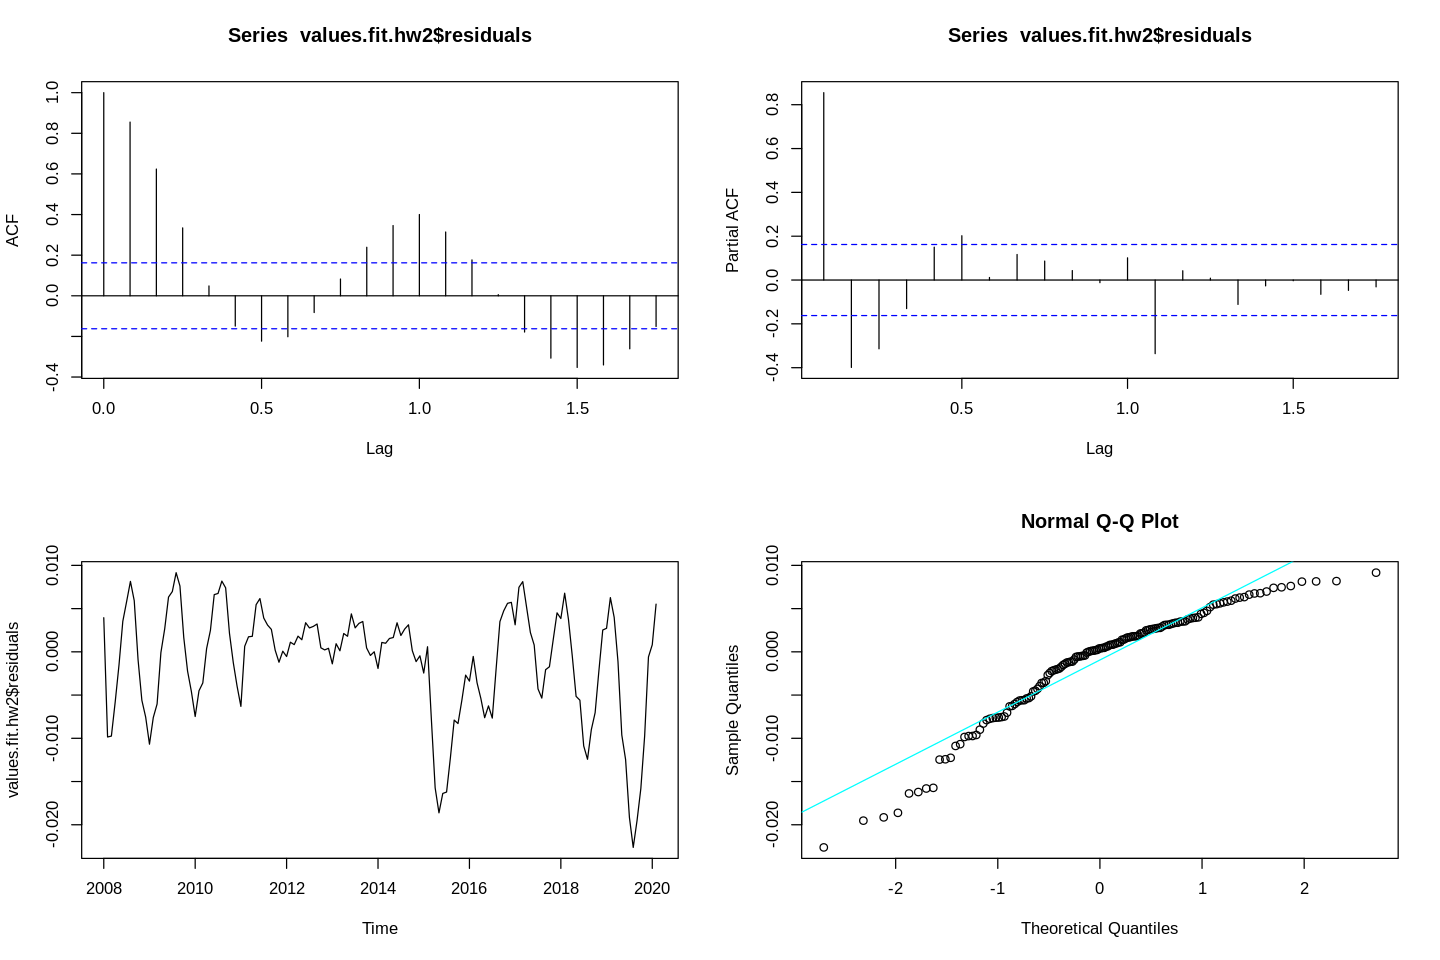

In [68]:
par(mfrow=c(2,2))
acf(values.fit.hw2$residuals)
pacf(values.fit.hw2$residuals)
plot(values.fit.hw2$residuals)
qqnorm(values.fit.hw2$residuals)
qqline(values.fit.hw2$residuals, col="cyan")

In [69]:
mymodel

         Point Forecast    Lo 80     Hi 80      Lo 95    Hi 95
Mar 2022       857.2604 719.8979  994.6229  647.18263 1067.338
Apr 2022       841.1951 598.7407 1083.6494  470.39308 1211.997
May 2022       906.1861 592.0208 1220.3513  425.71181 1386.660
Jun 2022       991.1275 618.8165 1363.4385  421.72698 1560.528
Jul 2022      1173.3928 750.8633 1595.9223  527.18976 1819.596
Aug 2022      1290.8917 823.5088 1758.2747  576.09120 2005.692
Sep 2022      1145.8569 637.5632 1654.1506  368.48871 1923.225
Oct 2022      1109.1191 562.9706 1655.2675  273.85702 1944.381
Nov 2022       915.9048 334.3604 1497.4491   26.50942 1805.300
Dec 2022       878.9678 264.0617 1493.8739  -61.44993 1819.386
Jan 2023       805.8698 159.3205 1452.4191 -182.94208 1794.682
Feb 2023       835.6675 158.9593 1512.3757 -199.26834 1870.603